<a href="https://colab.research.google.com/github/Fantasticoman/Machine_Failure_Prediction/blob/main/MFP_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: **Predicción de Fallos de Máquina**

## Etapas proyecto DS y ML

1. Enmarcar el problema y ver el panorama general.
2. Obtener los datos.
3. Explorar los datos para obtener información.
4. Preparar los datos para encontrar los patrones de datos subyacentes a los algoritmos de machine learning.
5. Explorar varios modelos diferentes y preseleccionar los mejores.
6. Ajustar los modelos y combinarlos en una gran solución.
7. Presentar la solución.
8. Poner en marcha, supervisar y mantener el sistema.

## 1.Enmarcar el problema
Explicado en documentación punto 7



# 2. Cargar datos

Cargamos los datos desde el archivo csv.

In [ ]:
import pandas as pd # procesar analizar limpiar datos
import numpy as np # operaciones matemáticas
import seaborn as sns # visualizar datos
import matplotlib.pyplot as plt # visualizar datos

In [ ]:
df_fail = pd.read_csv("/content/sample_data/Machine_ failure_data.csv") # DataFrames -> Tabla

In [ ]:
# 5 primeras filas
df_fail.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


**Description**


**1.- footfall:** The number of people or objects passing by the machine. Range 0--n

**2.- tempMode:** The temperature mode or setting of the machine. Range=0--7

**3.- AQ:** Air quality index near the machine. Range 1--7

**4.- USS:** Ultrasonic sensor data, indicating proximity measurements.Range 1--7

**5.- CS:** Current sensor readings, indicating the electrical current usage of the machine. Range 1--7

**6.- VOC:** Volatile organic compounds level detected near the machine. Range 0--6

**7.- RP:** Rotational position or RPM (revolutions per minute) of the machine parts. Range 1 --100

**8.- IP:** Input pressure to the machine. Range 1--7

**9.- Temperature:** The operating temperature of the machine. Range 0-30

**10 fail:** Binary indicator of machine failure (1 for failure, 0 for no failure).



## 3.Exploratory Data Analysis

In [ ]:
# resumen columnas
df_fail.info()

No hay datos Nulos, está bien rellenados. Todos son números

In [ ]:
# resumen estadístico
df_fail.describe()

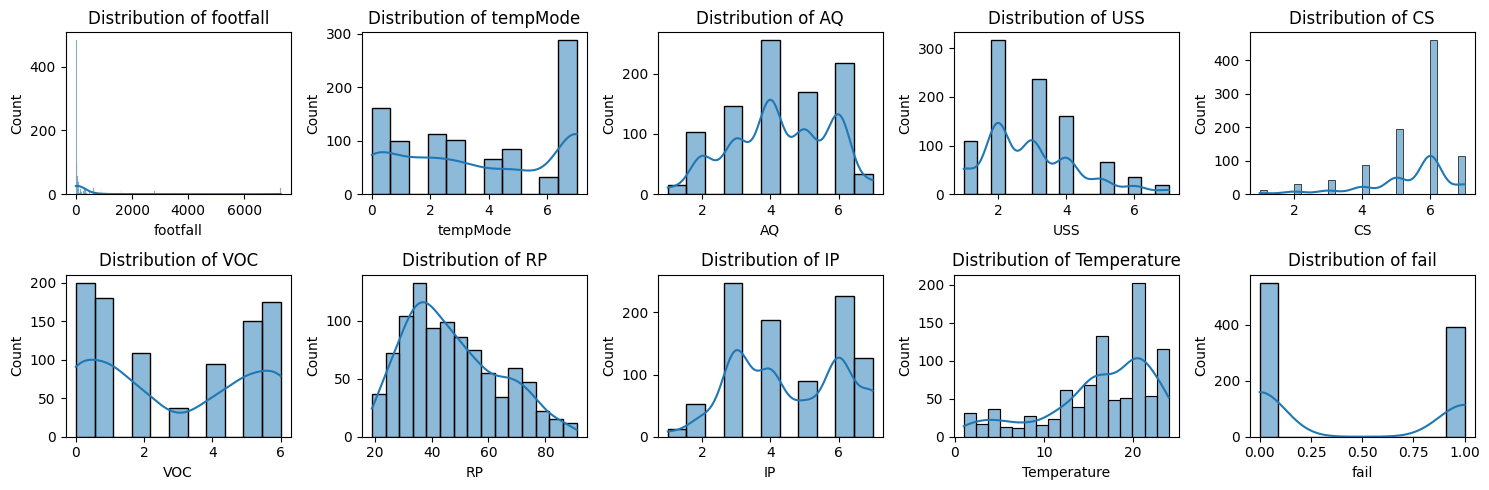

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt # import the matplotlib library
import seaborn as sns # import the seaborn library

fig, axes = plt.subplots(2, 5,figsize=(15, 5))
axes = axes.flatten()  # transformamos a array unidimensional.
# Esto facilitará la iteración sobre los diferentes subplots de forma secuencial.


# Dibujamos la distribución de todas las columnas
column_name = df_fail.columns # asignamos todos los nombres de columnas
# de df_fail a Column_name

for i, column in enumerate(column_name):
    sns.histplot(df_fail[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    plt.tight_layout()

In [ ]:
correlation_matrix = df_fail.corr()
print(correlation_matrix)

             footfall  tempMode        AQ       USS        CS       VOC  \
footfall     1.000000  0.020457 -0.065816  0.019453  0.025638 -0.089590   
tempMode     0.020457  1.000000 -0.010855  0.002142 -0.013956 -0.052369   
AQ          -0.065816 -0.010855  1.000000 -0.156884 -0.090010  0.618570   
USS          0.019453  0.002142 -0.156884  1.000000 -0.352915 -0.399477   
CS           0.025638 -0.013956 -0.090010 -0.352915  1.000000  0.048037   
VOC         -0.089590 -0.052369  0.618570 -0.399477  0.048037  1.000000   
RP          -0.043720  0.408784  0.094656 -0.032549 -0.026968  0.008023   
IP          -0.003869 -0.058109 -0.105868 -0.206416  0.185739  0.103628   
Temperature -0.018009 -0.062568  0.034328 -0.225122  0.143972  0.208956   
fail        -0.073066 -0.014462  0.583238 -0.466574  0.018855  0.797329   

                   RP        IP  Temperature      fail  
footfall    -0.043720 -0.003869    -0.018009 -0.073066  
tempMode     0.408784 -0.058109    -0.062568 -0.014462  
AQ 

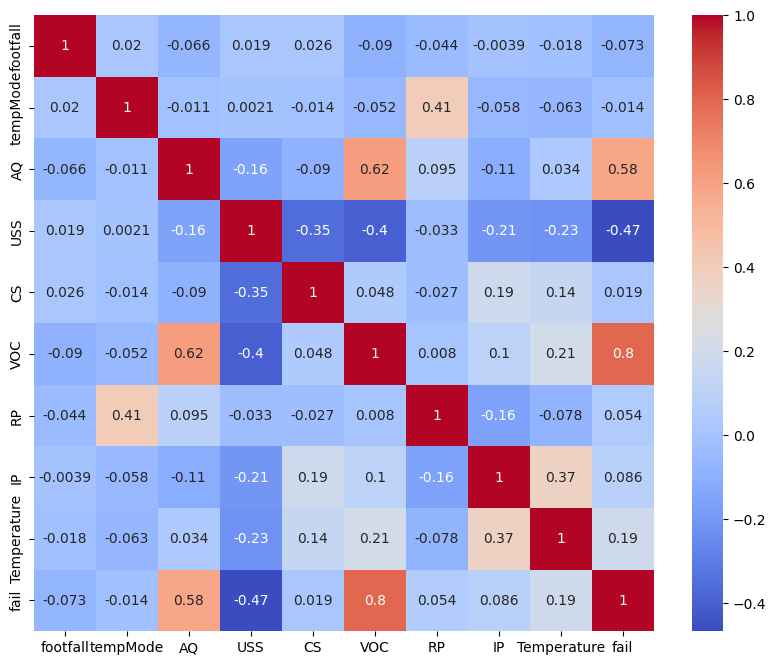

In [ ]:
# visualización correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Correlacion con la variable de salida
cor_target = abs(df_fail.corr()["fail"])
#Seleccionamos las variables con mayor índice de correlación
relevant_features = cor_target[cor_target>0.3]
relevant_features

,fail
AQ,0.583238
USS,0.466574
VOC,0.797329
fail,1.000000


In [ ]:
feature_df = df_fail[['AQ','USS','VOC','fail']]
feature_df.head()

,AQ,USS,VOC,fail
0,7,1,6,1
1,3,3,1,0
2,2,2,1,0
3,3,4,1,0
4,5,6,0,0


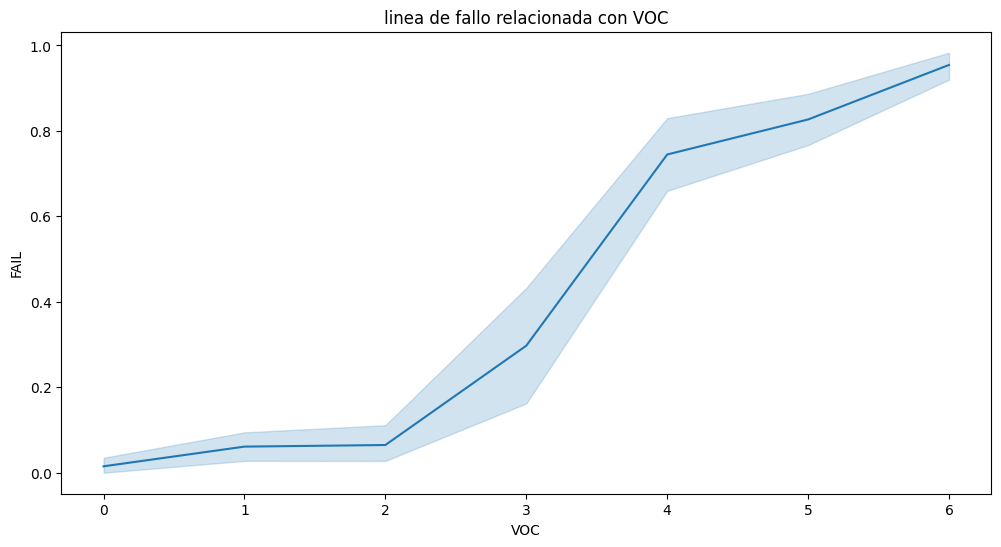

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='VOC', y='fail', data=df_fail)
plt.title('linea de fallo relacionada con VOC')
plt.xlabel('VOC')
plt.ylabel('FAIL')
plt.show()

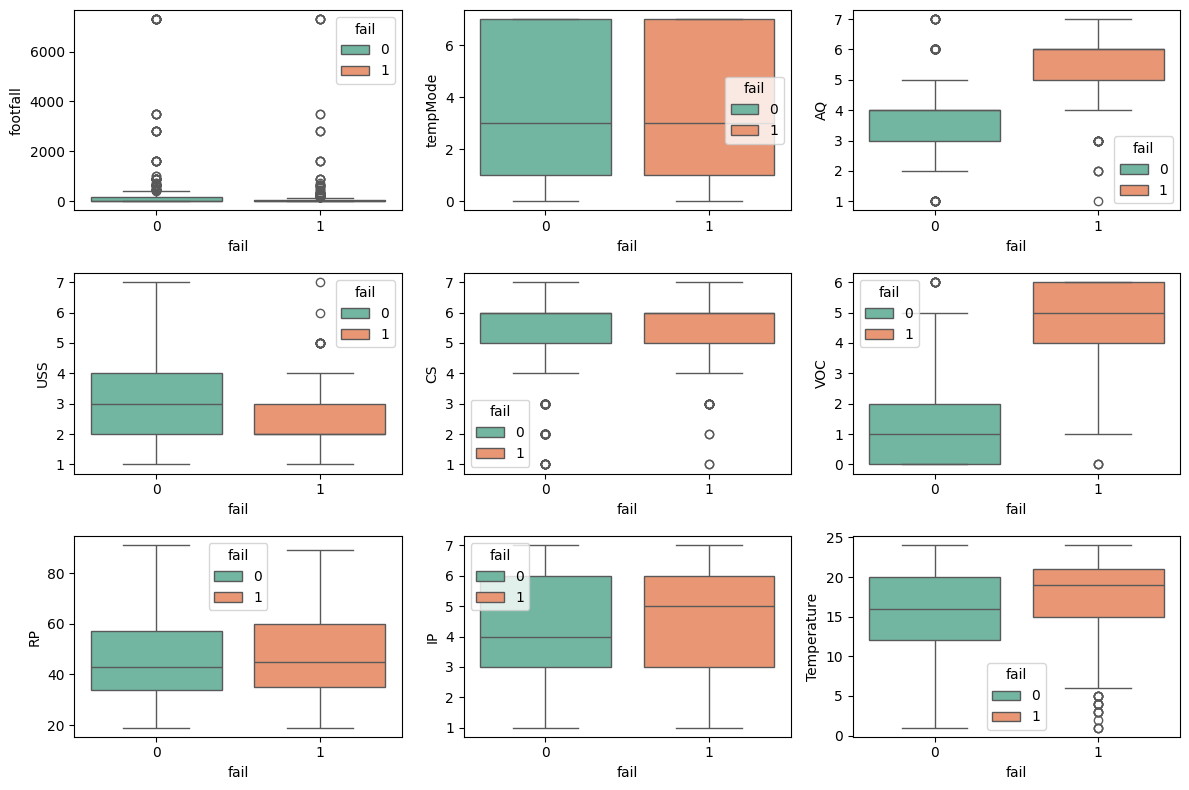

In [ ]:
# outliers boxplot
numeric_features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='fail', y=feature, data=df_fail, hue='fail', palette='Set2')

plt.tight_layout()
plt.show()




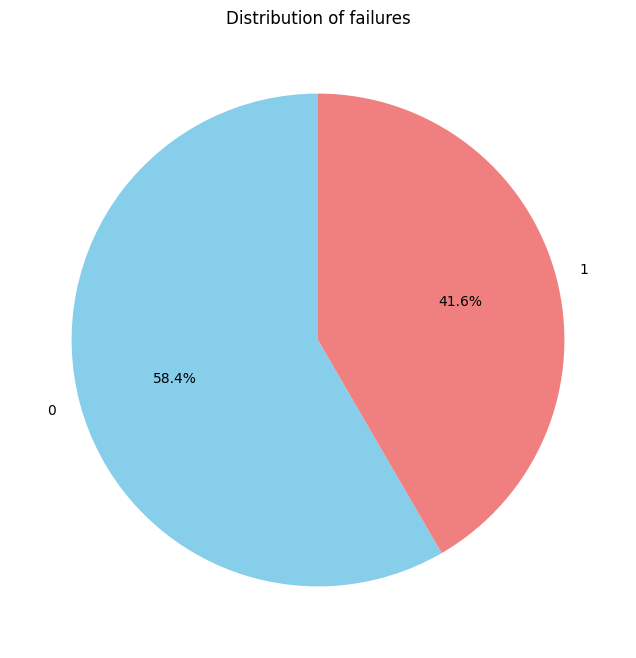

In [ ]:
# porcentaje distribución de fallos
condition_counts = df_fail['fail'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of failures')
plt.show()

Observamos que hay un buen ratio entre fallos y no fallo, bastante equilibrado

In [ ]:
# Ver si existen valores nulos
df_fail.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


## 4.Preparar los datos

**Missing Values**

In [ ]:
# missin values imputation
#si encintráramos un valor nulo relleneramos con la mediana
median_values = df_fail.median()
df_fail = df_fail.fillna(median_values)

In [ ]:
df_fail.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


**Outliers**

Outliers: No se observan tampoco datos atípicos.

In [ ]:
# eliminar
# tratar con el método IQR basado en quartiles

# **Feature Engineering**



In [ ]:
# Explicación en documentación punto 7 sobre características potencialmente válidas.
#1.-footfall * AQ
#df_fail['footfall_AQ'] = df_fail['footfall'] * df_fail['AQ']

#2.- Relación temperatura y modo de temperatura:
#df_fail['temp_tempMode_ratio'] = df_fail['Temperature'] / (df_fail['tempMode'] + 1)
                                                # +1 para evitar división por cero
#3.- Diferencia entre presión de entrada y corriente:
#df_fail['IP_CS_diff'] = df_fail['IP'] - df_fail['CS']

#esta última carácterística da valores negativos lo que produce fallos mas adelante.
#aplicaremos una  Transformación de Mínimos:
# Desplazar todos los valores para que sean no negativos.
#Esto preservará la información relativa entre los valores.

# Transformar IP_CS_diff para que sea no negativa
#min_value = df_fail['IP_CS_diff'].min()
#if min_value < 0:
   #df_fail['IP_CS_diff'] = df_fail['IP_CS_diff'] - min_value


print(df_fail.head())


   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


# **Feature Scaling**


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos las columnas aescalar
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']#,'footfall_AQ','temp_tempMode_ratio','IP_CS_diff'

# Inicializamos el "escalador"
scaler = MinMaxScaler()

# Aplicamos el escalado
df_fail[features] = scaler.fit_transform(df_fail[features])


# Visualizamos el DataFrame con las variables escaladas
print(df_fail.head())



   footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1  0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2  0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3  0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4  0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   

         IP  Temperature  fail  
0  0.333333          0.0     1  
1  0.500000          0.0     0  
2  0.833333          0.0     0  
3  0.833333          0.0     0  
4  0.833333          0.0     0  


**Features (X) vs Target (Y)**





In [ ]:
X = df_fail.drop(['fail'], axis=1)  # Eliminar solo la columna target 'fail'
Y = df_fail['fail']  # La columna 'fail' como target
X.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
0,0.000000,1.000000,1.000000,0.000000,0.833333,1.000000,0.236111,0.333333,0.0
1,0.026027,0.142857,0.333333,0.333333,0.666667,0.166667,0.013889,0.500000,0.0
2,0.004247,1.000000,0.166667,0.166667,0.833333,0.166667,0.069444,0.833333,0.0
3,0.011370,0.571429,0.333333,0.500000,0.666667,0.166667,0.125000,0.833333,0.0
4,0.087671,1.000000,0.666667,0.833333,0.500000,0.000000,0.680556,0.833333,0.0


In [ ]:
Y.head()

,fail
0,1
1,0
2,0
3,0
4,0


**Train - Test split**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplicamos el escalado a los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Luego entrenaremos el modelo con X_train y Y_train




**Feature Selection**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Definimos las características y el target
X = df_fail.drop('fail', axis=1)
print(X.head())
y = df_fail['fail']

# Aplicamos SelectKBest con Chi-cuadrado
test = SelectKBest(score_func=chi2, k=3)  # Seleccionamos las 3 características más importantes
X_new = test.fit_transform(X, y)

# Ver qué características han sido seleccionadas
print("Puntuación de características:", test.scores_)
print("Características seleccionadas:", X.columns[test.get_support()])


   footfall  tempMode        AQ       USS        CS       VOC        RP  \
0  0.000000  1.000000  1.000000  0.000000  0.833333  1.000000  0.236111   
1  0.026027  0.142857  0.333333  0.333333  0.666667  0.166667  0.013889   
2  0.004247  1.000000  0.166667  0.166667  0.833333  0.166667  0.069444   
3  0.011370  0.571429  0.333333  0.500000  0.666667  0.166667  0.125000   
4  0.087671  1.000000  0.666667  0.833333  0.500000  0.000000  0.680556   

         IP  Temperature  
0  0.333333          0.0  
1  0.500000          0.0  
2  0.833333          0.0  
3  0.833333          0.0  
4  0.833333          0.0  
Puntuación de características: [2.63814842e+00 5.41733000e-02 3.32669825e+01 3.37741556e+01
 2.04883027e-02 1.81683178e+02 3.62815650e-01 8.26527537e-01
 3.45558809e+00]
Características seleccionadas: Index(['AQ', 'USS', 'VOC'], dtype='object')


## 5.Entrenamiento Machine Learning

In [ ]:

# entrenamos y evaluamos todos
#importamos métricas
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Modelos que probaremos
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    #"Neural Network": MLPClassifier(max_iter=1000)
}

# Lista para almacenar los resultados
results = []

# Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    # Entrenar el modelo sin cross validation
    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Validación cruzada
    cv_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Almacenar resultados
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Mean_CV_Acc": mean_cv_score,#con el Cross Validation
        "CV_Std_Dev": std_cv_score
    })

# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  # Ajusta el ancho para ver todo seguido

# Crear un DataFrame de los resultados
results_df = pd.DataFrame(results)

# Mostrar el DataFrame
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score  Mean_CV_Acc  CV_Std_Dev
0  Logistic Regression  0.873016   0.838710  0.896552  0.866667     0.906760    0.017383
1        Decision Tree  0.809524   0.768421  0.839080  0.802198     0.813565    0.024861
2        Random Forest  0.878307   0.863636  0.873563  0.868571     0.886682    0.030696
3    Gradient Boosting  0.878307   0.872093  0.862069  0.867052     0.862310    0.032016
4                  SVM  0.888889   0.875000  0.885057  0.880000     0.907824    0.016353
5                  KNN  0.862434   0.835165  0.873563  0.853933     0.901463    0.018022


In [ ]:
#predecir veamos falsos positivos negativos y precisión del modelo seleccionado.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Entrenamos el modelo de Random Forest
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train_scaled, Y_train)

# Realizamos las predicciones en el conjunto de prueba
Y_pred = model.predict(X_test_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)
accuracy_score(Y_test, Y_pred)

# Extraemos los falsos negativos
FN = cm[1, 0]
FP = cm[0, 1]
acu= accuracy_score(Y_test, Y_pred)
print('Matriz de Confusion. Modelo: Support Vector Machines (SVM)')
print("Falsos Negativos:", FN)
print("Falsos Positivos:", FP)
print("Precision:",acu)
from sklearn.metrics import confusion_matrix




Matriz de Confusion. Modelo: Support Vector Machines (SVM)
Falsos Negativos: 10
Falsos Positivos: 11
Precision: 0.8888888888888888


## 6.Ajuste hiperparámetros y optimización

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definimos el espacio de búsqueda para SVM
svm_param_grid = {
  'C': [0.1, 1, 10, 100],  # Parámetro de regularización
  'gamma': ['scale', 'auto', 0.01, 0.001],  # Coeficiente del kernel
  'kernel': ['linear', 'rbf', 'poly']  # Tipo de kernel
}

# Creamos el modelo SVM y Configuramos GridSearchCV para SVM
svm_model = SVC()

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ejecutamos la búsqueda de hiperparámetros y mostramos los mejores
svm_grid_search.fit(X_train_scaled, Y_train)
print("Mejores parámetros para SVM:", svm_grid_search.best_params_)

# Evaluamos el modelo optimizado en el conjunto de prueba
best_svm_model = svm_grid_search.best_estimator_
Y_pred_optimized = best_svm_model.predict(X_test_scaled)

# Calculamos las métricas de rendimiento
accuracy_optimized = accuracy_score(Y_test, Y_pred_optimized)
precision_optimized = precision_score(Y_test, Y_pred_optimized)
recall_optimized = recall_score(Y_test, Y_pred_optimized)
f1_optimized = f1_score(Y_test, Y_pred_optimized)

print(f"Modelo SVM rendimiento optimizado:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"Precision: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1 Score: {f1_optimized:.4f}")

Mejores parámetros para SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Modelo SVM rendimiento optimizado:
Accuracy: 0.8889
Precision: 0.8511
Recall: 0.9195
F1 Score: 0.8840


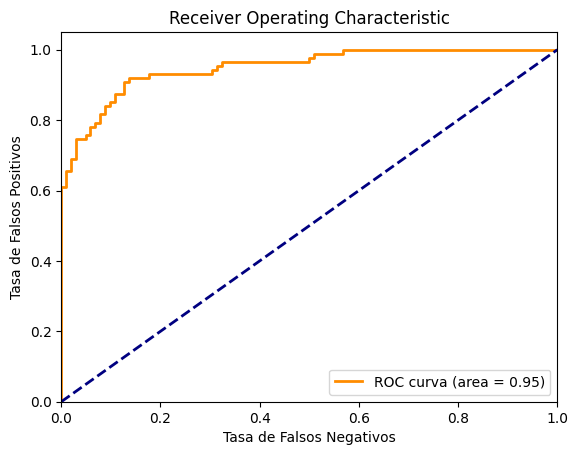

In [ ]:
   from sklearn.metrics import roc_curve, auc
   import matplotlib.pyplot as plt

   # Obtener las probabilidades de predicción
   Y_prob = best_svm_model.decision_function(X_test_scaled)

   # Calcular la curva ROC
   fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
   roc_auc = auc(fpr, tpr)

   # Visualizar la curva ROC
   plt.figure()
   plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curva (area = %0.2f)' % roc_auc)
   plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('Tasa de Falsos Negativos')
   plt.ylabel('Tasa de Falsos Positivos')
   plt.title('Receiver Operating Characteristic')
   plt.legend(loc="lower right")
   plt.show()

In [ ]:
import pickle

# best_svm_model es tu modelo entrenado
# Guarda el modelo en un archivo
filename = 'SVM_Fail_model.sav'
with open(filename, 'wb') as file:
  pickle.dump(best_svm_model, file)

print(f"Modelo guardado en {filename}")

# Cuando queramos cargar el modelo desde el archivo haremos
#with open(filename, 'rb') as file:
  #loaded_model = pickle.load(file)

# Ahora puedes usar loaded_model para hacer predicciones
# Y_pred = loaded_model.predict(X_test_scaled)

Modelo guardado en SVM_Fail_model.sav


# **7.Presentación proyecto**

## 1.Enmarcar el problema



**Problema / Objetivo:** Predecir fallos en la máquina antes de que ocurran, permitiendo realizar mantenimiento preventivo.
Alternativas: Mantenimiento predictivo basado en reglas fijas o monitoreo continuo manual, ambos menos eficientes y mas costosas
Objetivo: Al menos 80-90% de precisión para minimizar costos por fallos no anticipados o mantenimientos innecesarios.

**Datos supervisados**(con etiquetas de fallo/no fallo), fuera de línea (entrenamiento previo).

**Tipo problema:** Clasificación Binaria
  Similares a modelos de mantenimiento predictivo en la industria manufacturera; se pueden reutilizar técnicas de modelos predictivos de fallos como Random Forest, XGBoost, o LSTM.

Cómo se resolvería el problema manualmente:

  Revisión constante de los datos de sensores y monitoreo de cambios inusuales o desviaciones, pero sería ineficiente y propenso a errores.

**Suposiciones:**

  Los sensores funcionan correctamente.
  Los datos históricos contienen suficientes ejemplos de fallos.
  El fallo ocurre después de patrones detectables en los datos.

**Verificar los supuestos si es posible**

  Revisar la calidad de los datos históricos, validar que los sensores no presentan errores, están bien calibrados y verificar la existencia de correlación entre las lecturas y los fallos.

**Tipo de Datos:** CSV, tablas

**Origen de los datos:** https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data/data

**Permisos:**  Grant of Copyright License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable copyright license to reproduce, prepare Derivative Works of, publicly display, publicly perform, sublicense, and distribute the Work and such Derivative Works in Source or Object form.

**Tamaño:** Archivo.csv 22k. 944 muestras registros. Reservaremos el 20% para testeo, 188 entradas.

**Datos verificados y consistentes:** Ultima actualización Junio 2024

# 2.- Carga de datos
**Descripción de los datos cargados**

1.- footfall: The number of people or objects passing by the machine. Range 0--n

2.- tempMode: The temperature mode or setting of the machine. Range=0--7

3.- AQ: Air quality index near the machine. Range 1--7

4.- USS: Ultrasonic sensor data, indicating proximity measurements.Range 1--7

5.- CS: Current sensor readings, indicating the electrical current usage of the machine. Range 1--7

6.- VOC: Volatile organic compounds level detected near the machine. Range 0--6

7.- RP: Rotational position or RPM (revolutions per minute) of the machine parts. Range 1 --100

8.- IP: Input pressure to the machine. Range 1--7

9.- Temperature: The operating temperature of the machine. Range 0-30

10 fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

# 3.- Exploratory Data Analysis


En la exploración de datos observamos que no hay datos nulos, está bien rellenados. Todos son números.
Además observamos que hay un buen ratio entre fallos y no fallo, bastante equilibrado, casi 50/50.

**1 .-Distribución de los Datos**

**Distribución de Footfall:**

La mayoría de las lecturas de footfall (pisadas) están muy concentradas en valores pequeños, con un pico en el valor más bajo y una larga cola hacia valores altos. Esto apunta a que en la mayoría de las ocasiones, hay un bajo número de personas u objetos que pasan cerca de la máquina, pero en casos excepcionales, este número puede ser muy alto.

**Distribución de tempMode:**

El modo de temperatura parece tener una distribución en varios niveles, con el mayor pico en el nivel más alto de la configuración de temperatura. Esto podría indicar que la máquina opera con una frecuencia mayor en un rango de temperaturas más alto.

**Distribución de AQ (Air Quality):**

La calidad del aire cerca de la máquina parece seguir una distribución discreta con varios picos distribuidos uniformemente. Esto sugiere que la calidad del aire es relativamente equilibrada, con varios rangos predominando.

**Distribución de USS (Ultrasonic Sensor):**

La proximidad medida por el sensor ultrasónico muestra una distribución discreta con varios picos. Esto indica que las lecturas del sensor ultrasónico están en diferentes intervalos y parecen medir distancias en saltos específicos, probablemente debido al tipo de sensor utilizado.

**Distribución de CS (Current Sensor):**

Las lecturas del uso de corriente tienen una distribución bimodal, con un pico fuerte en valores bajos y otro en valores altos. Esto sugiere que la máquina podría tener dos modos operativos, uno de bajo consumo de corriente y otro de alto consumo.

**Distribución de VOC (Volatile Organic Compounds):**

Los niveles de compuestos orgánicos volátiles muestran una distribución ondulante. Esto sugiere que los niveles de VOC varían considerablemente, sin ningún valor dominante claro. Esto podría estar relacionado con la operación de la máquina en diferentes entornos o momentos del día.

**Distribución de RP (Rotational Position - RPM):**

La posición de rotación o RPM parece seguir una distribución más uniforme, aunque con un pico hacia el centro. Esto podría indicar que las piezas de la máquina tienden a operar en un rango de RPM más controlado, con lecturas tanto en valores bajos como altos, pero con un valor típico más frecuente.

**Distribución de IP (Input Pressure):**

La presión de entrada muestra una distribución discreta con picos bien definidos, lo que podría indicar que la máquina opera en distintos intervalos de presión predeterminados.

**Distribución de Temperature:**

La temperatura de operación muestra una distribución con varios picos y parece tener dos intervalos dominantes, lo que podría indicar que la máquina opera en dos configuraciones de temperatura distintas, lo que tal vez corresponda a diferentes modos de operación.

**Distribución de fail (indicador de fallo):**

La variable de fallo binaria tiene dos picos claros en los valores de 0 y 1. Esto muestra que hay bastantes casos tanto de fallos como de no fallos, lo que sugiere que los datos están bastante equilibrados entre ambos estados.


**Conclusiones generales:**

Las distribuciones muestran que las variables tienen diferentes niveles de variabilidad. Algunas están concentradas en valores discretos o fijos (como tempMode, AQ, y IP), mientras que otras presentan distribuciones más continuas o multimodales (como footfall y CS).

La variable de fallo tiene un balance adecuado entre fallos y no fallos, esto es bueno ya que no parece haber un sesgo importante hacia un solo resultado, lo que nos ayudará en el entrenamiento de un modelo de clasificación,

Cada una de estas distribuciones puede influir de manera distinta en la predicción de fallos, y la información de este análisis nos ayudará a seleccionar y ajustar los modelos de ML.



**2.- Correlaciones entre datos:**

**VOC y Fail (correlación de 0.8)**:

Podemos obsevar una fuerte correlación entre el nivel de compuestos orgánicos volátiles (VOC) y la probabilidad de fallo de la máquina (fail). Esto podría indicar que el aumento de VOCs cerca de la máquina, aumentaría la posibilidad de un fallo.

**AQ y VOC (correlación de 0.62):**

Hay una correlación positiva significativa entre la calidad del aire (AQ) y los niveles de VOCs. Esto tiene sentido, ya que los VOCs son un tipo de contaminante que influye en el índice de calidad del aire. Si el nivel de VOC aumenta, probablemente también empeore la calidad del aire, y se relaciona con la correlación anterior.

**tempMode y RP (correlación de 0.41):**

La relación positiva entre el modo de temperatura (tempMode) y las revoluciones por minuto (RP) indica que, a medida que cambia el modo de temperatura de la máquina, las RPM también pueden variar. Esto podría deberse a que los diferentes modos de temperatura impactan el funcionamiento de la máquina y, en consecuencia, la velocidad de las piezas giratorias.

**USS y AQ (correlación de -0.4):**

El sensor ultrasónico (USS) muestra una correlación negativa moderada con la calidad del aire (AQ), lo que podría implicar que a medida que aumenta la proximidad a ciertos objetos (medida por el sensor ultrasónico), la calidad del aire empeora. Esto podría indicar que, en entornos con más objetos cercanos a la máquina, el aire se vuelve más contaminado y como hemos visto en anteriores correlaciones, podría influir en la probabilidad de fallo.

**USS y Fail (correlación de -0.47):**

También hay una correlación negativa significativa entre las mediciones del sensor ultrasónico (USS) y el fallo de la máquina. Esto podría significar que cuando los objetos o personas están más cerca de la máquina (medido por el USS), la probabilidad de fallo disminuye.


**Otras observaciones:**

**Fail y AQ (correlación de 0.58):**

Existe una correlación positiva moderada entre el índice de calidad del aire (AQ) y los fallos de la máquina. Esto puede estar relacionado con la acumulación de contaminantes en el entorno de la máquina, afectando su funcionamiento.

**Footfall y Fail (correlación de -0.073):**

No hay una correlación significativa entre el número de personas u objetos que pasan por la máquina (footfall) y el fallo de la máquina, lo cual indica que esta variable probablemente no tiene un impacto directo en los fallos.



**Conclusión:**
Los resultados parecen apuntar que las variables que tienen una relación más fuerte con el fallo de la máquina son:
 Los niveles de VOC, la calidad del aire y, en menor medida, el sensor de proximidad (USS).

 Las correlaciones entre las variables sugieren que factores ambientales como la calidad del aire y la presencia de compuestos volátiles pueden estar jugando un papel crucial en la ocurrencia de fallos en la máquina, lo que podría ser un foco de atención en el desarrollo de modelos predictivos.

# 4.Preparar los datos

**Outliers:** No se observan tampoco datos atípicos.

**Variables categóricas**:
Dado que todas las variables son numéricas, no es necesario usar get_dummies. Sin embargo, si resaltar que muchas de las variables tienen un rango discreto de valores (0-7), es interesante considerar hacer un análisis de cómo estos valores afectan el fallo de la máquina.

**Feature Engineering:**

Se podrían agregar algunas columnas adicionales en la tabla de datos basadas en el cruce o interacciones entre variables, es decir, combinar variables para proporcionar más información, que podrían mejorar el rendimiento predictivo y proporcionar información adicional sobre el comportamiento de la máquina, como:

1.- Multiplicar el número de personas u objetos que pasan por la máquina (footfall) por el nivel de calidad del aire (AQ)  para analizar si un alto tráfico afecta la calidad del aire.

2.- La relación entre la temperatura y el tempMode:

Nueva columna que mida la relación entre la Temperatura y tempMode, para ver si la máquina se calienta más de lo esperado en determinados modos y ver si las máquinas operan fuera de los rangos óptimos

3.- Diferencia entre la presión de entrada (IP) y el uso de corriente (CS).

Columna que calcule la diferencia entre la presión de entrada (IP) y el uso de corriente CS para ver si el uso de energía se correlaciona con la presión.

4.- Transformación logarítmica de RPM:

Añadir una versión transformada logarítmicamente de las RPM (RP), lo cual puede ayudar a estabilizar la varianza y mejorar la interpretación de esta variable. Hemos probado los cinco modelos con y sin las características añadidas:

Se han realizado varias pruebas con distintos modelos en evaluación directa del conjunto de datos y validación cruzada y los resultados obtenidos son los siguientes:


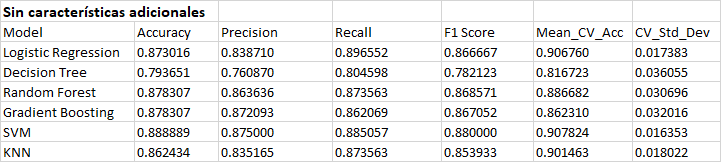




Falsos Negativos: 10 Falsos positivos: 11



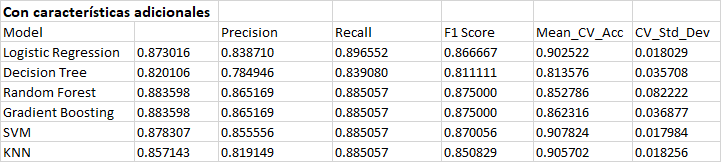

Falsos Negativos: 10 Falsos positivos: 13

Observamos como en la mayoría de los modelos con el conjunto de datos que tenemos, es decir, en evaluación directa, si se observan mejoras en la precisión de la mayoría de los modelos, algunas significativas como en Decision Tree o Ramdon forrest. Lo que podría indicar que es buena idea añadir estos nuevos valores.

Pero al aplicar Validación Cruzada ya no se observa esa mejora. Como desconocemos los datos que tendremos en el futuro y el modelo de Validación Cruzada presenta más robustez y garantía frente a conjuntos de datos desconocidos, y además, como el modelo de machine learning no presenta ninguna mejora notable en el rendimiento predictivo con validación cruzada, no añadiremos a nuestra tabla de datos más caracteristicas que las conocidas y dejaremos el código comentado sin aplicar.

**Feature Scaling**

Existen 2 métodos
 **1. Normalización (Min-Max Scaling)**: Este método ajusta los valores de las características para que estén entre 0 y 1. La normalización es más usada si las características tienen límites claros y se quiere que estén entre 0 y 1.

**Estandarización (Standard Scaling):** Este método ajusta las características para que tengan una media de 0 y una desviación estándar de 1. La estandarización es mas recomendada si las características tienen diferentes distribuciones y queremos normalizarlas en torno a la media.

Dado que las variables tienen diferentes rangos y algunas, como RP (RPM) y Temperature, tienen un rango significativamente mayor en comparación con otras, usaremos Min-Max Scaling. Este método asegura que todas las variables queden dentro de un rango común (0 a 1), lo cual es útil cuando los algoritmos son sensibles a los rangos de valores, como las redes neuronales o algoritmos basados en distancia (p.ej., KNN).

StandardScaler podría ser más apropiado si el enfoque estuviera en algoritmos que asuman que los datos tienen una distribución normal (p.ej., regresión lineal), pero dado el rango variado de nuestras variables, Min-Max Scaling consideramos que es la opción más directa y útil para este caso.

**Features (X) vs Target (Y)**

La fase de Features (X) vs Target (Y) es  clave en el proceso de modelado supervisado. Se refiere a la división de los datos en:

Features (X): Variables independientes, son las columnas o atributos que se utilizan para hacer predicciones.
footfall, tempMode, AQ, USS, CS, VOC, RP, IP, Temperature, etc.

Target (Y): Variable dependiente o etiqueta,  lo que se intenta predecir.
fail, que indica si la máquina fallará o no (1 o 0).

**Train - Test split**

Dividimos el conjunto de datos en conjuntos de entrenamiento 80% y prueba 20%, para entrenar el modelo y luego evaluar su rendimiento de acierto con los datos no usados.

**Feature Selection**

 Aplicamos un método de selección de características para elegir las variables más importantes. Aplicaremos SelectKBest con el método Chi-cuadrado


## 5.Entrenamiento Machine Learning

La predicción de prevención de fallos es un problema de clasificación binaria donde el objetivo es predecir fallos en una máquina. Así que probaremos varios modelos adecuados a esta tipología y seleccionaremos el que presenta mejor resultados.
Los modelos que seleccionamos para probar son:

1.- Regresión Logística.

2.- Árboles de Decisión.

3.- Random Forest.

4.- Gradient Boosting (e.g., XGBoost, LightGBM).

5.- Support Vector Machines (SVM).

6.- K-Nearest Neighbors (KNN).

7.- Redes Neuronales.


**Observaciones de los Resultados**

Todos los modelos tienen una precisión bastante alta, alrededor del 86% al 89% (a exepción de Decision Tree), lo cual es un buen indicador de que los datos son predecibles con las características actuales.
Descartamos redes neuronales ya que no se cuenta con suficientes registros para que el modelo tenga tenga suficiente información para aprender patrones complejos de manera efectiva.

**Selección de Modelo Predictivo Óptimo:**

El modelo de Random Forest tiene la mayor precisión 89.4% frente a 0.88 de **Support Vector Machines (SVM)** y un buen equilibrio entre precisión y recall, lo que podría inclinar la selección hacia este modelo como el más efectivo en este conjunto de datos.

Pero, basándonos en la precisión media y la consistencia (baja desviación estándar), en la validación cruzada, **SVM** parece ser el mejor modelo en este caso. Tiene la mayor precisión media y una desviación estándar razonablemente baja, lo que indica un buen equilibrio entre precisión y robustez.

Aunque Random Forest puede parecer el mejor en una evaluación directa, la validación cruzada proporciona una visión más completa y generalizable del rendimiento del modelo, por lo que seleccionaremos SVM .



## 6.Ajuste hiperparámetros y optimización
Configurar y ejecutar GridSearchCV para optimizar los hiperparámetros de SVM.

**Curva ROC y AUC**
Como añadido he implentado la realización de la curva ROC y el AUC que  proporciona información valiosa sobre el rendimiento del modelo de clasificación. Considero interesante incluir esta curva ya que proporciona una comprensión más completa del rendimiento del modelo, especialmente en términos de su capacidad para distinguir entre clases.
Así obtenemos más información sobre la idónea elección del modelo.

**Área Bajo la Curva (AUC):**

El AUC es 0.95. Un AUC de 0.95 indica que el modelo tiene una alta capacidad para distinguir entre las clases positivas y negativas.

**Curva ROC:**

La curva ROC muestra la relación entre la tasa de verdaderos positivos  y la tasa de falsos positivos para diferentes umbrales de decisión.

La curva se acerca mucho al eje vertical izquierdo y al eje horizontal superior, lo que indica que el modelo tiene una alta sensibilidad y especificidad.
Por consiguiente podemos deducir que el modelo es muy efectivo para clasificar correctamente las instancias positivas y negativas.
La alta AUC sugiere que el modelo es robusto y generaliza bien a datos no vistos.

## 8.Deployment (Puesta en marcha)

**Paso 1: Entrenar el Mejor Modelo con Todos los Datos**

In [ ]:
# Volvemos a entrenar el modelo SVM con todos los datos
best_svm_model.fit(X, Y)

SVC(C=1, gamma='auto')

**Paso 2: Guardar el Modelo Entrenado**

In [ ]:
  import pickle

  # Guardaremos el modelo en un archivo .pkl
  with open('SVM_Fail_model_full.pkl', 'wb') as file:
      pickle.dump(best_svm_model, file)

**Paso 3: Paquetizar el Modelo en una API**

In [ ]:
  from flask import Flask, request, jsonify
  import pickle

  # Cargar el modelo
  with open('SVM_Fail_model_full.pkl', 'rb') as file:
      model = pickle.load(file)

  app = Flask(__name__)

  @app.route('/predict', methods=['POST'])
  def predict():
      data = request.get_json(force=True)
      # Preprocesar los datos de entrada aquí si es necesario
      prediction = model.predict([data['features']])
      return jsonify({'prediction': prediction.tolist()})

  if __name__ == '__main__':
      app.run(debug=True)

#Nos da un mensaje warning ya que estamos en Colab trabajando en el localhost de la máquina virtual en la nube de Google

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


**Paso 4: Cargar la API en un Servidor**
Sólo quedaría subir esta API a un servidor para hacerla accesible a través de Internet.

Se deberan realizar los siguientes pasos:

**1.-Buscar proveedor de Servicios en la Nube:**
Elige un proveedor como AWS, Google Cloud, o Heroku.

**2.-Configurar el Servidor:**

**3.-Automatización y Monitoreo:**

  

## EXTRA - PyCaret

## EXTRA 2 - Pandas Profiling